In [32]:
import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import cv2, 
import random
import json
import csv
import matplotlib.pyplot as plt

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tensorflow.keras import optimizers
import os
!git clone https://github.com/MarceloCMiguel/data-augmentation

fatal: destination path 'data-augmentation' already exists and is not an empty directory.


In [33]:
np.random.seed(20)


In [34]:
TRAIN_DIR = './cats_and_dogs_filtered/train/'
TEST_DIR = './cats_and_dogs_filtered/validation/'

ROWS = 150
COLS = 150
CHANNELS = 3

BATCH_SIZE=128

In [35]:
# Criando uma lista das imagens de treino totais e listas separadas para cada animal
original_train_images=[]
for i in os.listdir(TRAIN_DIR):
    #original_train_images.append(os.listdir(TRAIN_DIR+i))
    if i == 'dogs':
        train_dogs = os.listdir(TRAIN_DIR+i)
    if i == 'cats':
        train_cats = os.listdir(TRAIN_DIR+i)
    for images in os.listdir(TRAIN_DIR+i):
        original_train_images.append(f'{TRAIN_DIR}{i}/{images}')

random.shuffle(original_train_images)

#Separando a base de dados de treinamento em treinamento e validação
train_images = original_train_images[:1900]
validation_images = original_train_images[1900:]
print(len(train_images),len(validation_images))

1900 100


In [36]:
test_images=[]
for i in os.listdir(TEST_DIR):
    #print(TEST_DIR+i)
    for images in os.listdir(TEST_DIR+i):
        test_images.append(f'{TEST_DIR}{i}/{images}')

In [37]:
def plot_arr(arr):
    plt.figure()
    plt.imshow(image.array_to_img(arr))
    plt.show()

def plot(img):
    plt.figure()
    plt.imshow(img)
    plt.show()

In [38]:
def prep_data(images):
    count = len(images)
    X = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.float32)
    y = np.zeros((count,), dtype=np.float32)
    print("Starting")
    for i, image_file in enumerate(images):
        img = image.load_img(image_file, target_size=(ROWS, COLS))
        X[i] = image.img_to_array(img)
        if 'dog.' in image_file:
            y[i] = 1.
        i+=1
        if i == count:
            print('Processed {} of {}'.format(i, count))
        else:
            if i%1000 == 0: print('Processed {} of {}'.format(i, count))
        
    return X, y


In [39]:
X_train, y_train = prep_data(train_images)

Starting
Processed 1000 of 1900
Processed 1900 of 1900


In [40]:
X_validation, y_validation = prep_data(test_images)

Starting
Processed 1000 of 1000


In [41]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

validation_datagen = image.ImageDataGenerator(rescale=1./255)


In [42]:
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=BATCH_SIZE)

validation_generator = validation_datagen.flow(
    X_validation,
    y_validation,
    batch_size=BATCH_SIZE)

In [43]:
# def create_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(ROWS, COLS, CHANNELS)))
#     model.add(Conv2D(32, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
# #     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
# #     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
# #     model.add(MaxPooling2D(pool_size=(2,2)))
# #     model.add(Conv2D(256, (3, 3), activation='relu'))
# #     model.add(Conv2D(256, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     # model.add(Dropout(0.5))

#     model.add(Flatten())
#     model.add(Dropout(0.5))
#     model.add(Dense(512, activation='relu'))
#     # model.add(Dense(1024, activation='relu'))
#     # model.add(Dense(1000, activation='relu'))
#     # model.add(Dropout(0.5))
#     model.add(Dense(1, activation='sigmoid'))
    
#     return model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(ROWS, COLS, CHANNELS)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64))

    model.add(Dense(1,activation='sigmoid'))
    return model


In [44]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                5308480   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.compile(loss='binary_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [46]:
train_steps = len(train_images)/BATCH_SIZE
#validation_steps = len(validation_images)/BATCH_SIZE
validation_steps = len(test_images)/BATCH_SIZE
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
#     steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_steps,
#     validation_steps=len(validation_generator),
    verbose=0)


In [55]:
#print(history.history['loss'])
for i in history.history:
  print(i)

loss
accuracy
val_loss
val_accuracy


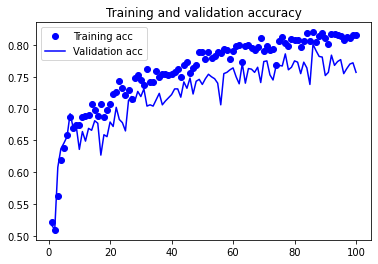

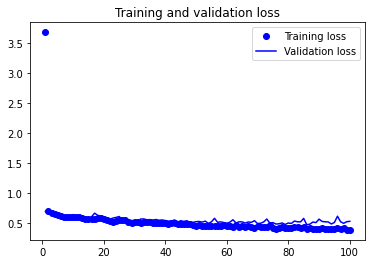

In [56]:
#acc = history.history['acc']
#val_acc = history.history['val_acc']
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [57]:
model.save('dogs-v-cat-data-augmentation-04.h5')

In [58]:

# evaluate model
_, acc = model.evaluate_generator(validation_generator, steps=validation_steps, verbose=0)
print('> %.3f' % (acc * 100.0))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 75.700


In [92]:

# plot diagnostic learning curves
def summarize_diagnostics(history):
  
  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.legend()
  plt.show()
  plt.subplot(212)
  
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.legend()
  # save plot to file
  # filename = sys.argv[0].split('/')[-1]
  # plt.savefig(filename + '_plot.png')
  #plt.close()

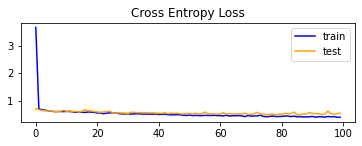

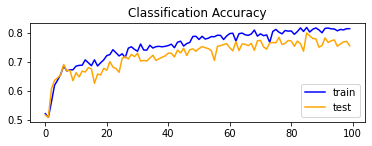

In [93]:
summarize_diagnostics(history)

In [99]:
random.shuffle(test_images)

In [100]:
X_test, _ = prep_data(test_images)
X_test /= 255.


Starting
Processed 1000 of 1000


In [101]:
#random.shuffle(X_test)
predictions = model.predict(X_test)


I am 91.08% sure this is a Dog


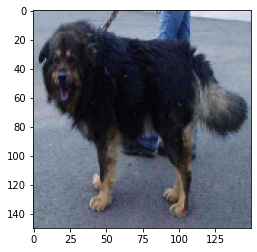

I am 97.66% sure this is a Dog


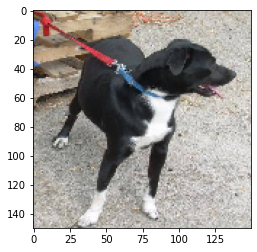

I am 96.15% sure this is a Dog


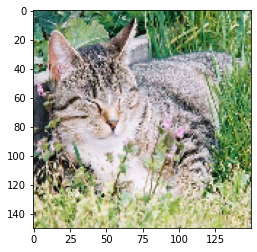

I am 74.95% sure this is a Cat


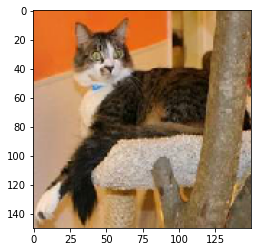

I am 83.47% sure this is a Cat


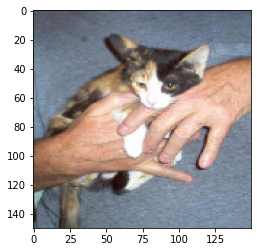

I am 99.11% sure this is a Cat


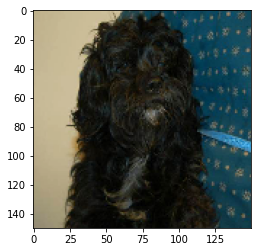

I am 74.83% sure this is a Dog


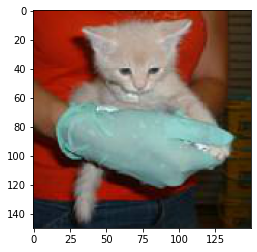

I am 100.00% sure this is a Dog


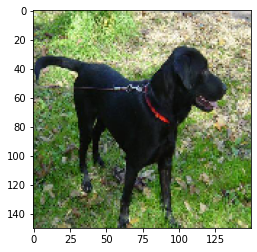

I am 89.35% sure this is a Cat


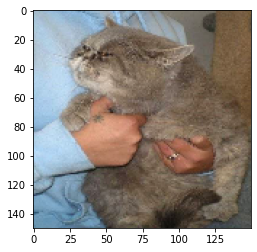

I am 65.53% sure this is a Cat


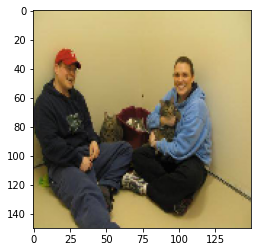

In [102]:
for i in range(0,10):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(predictions[i][0]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-predictions[i][0]))

    plt.imshow(image.array_to_img(X_test[i]))
    plt.show()
